# Introduction
This is a template to create, apply and validate a machine learning model for land use classificatin. The model is trained and valided with seperate shapefiles. The output include:

1. a statistic summary of the input training data for the model (export as .csv file).
2. a trained machine learning model. In this example a random forest model is used (export as a .pkl file). 
3. a classified image using the trained model (export as .tif). 
4. validating the classified image, generating an accuracy matrix and export as .csv file. 

# Using this template 

Set the variables in the first cell to the following:
```python
pyeo_path = "The folder that you cloned pyeo into"
training_tif = "The path to the stacked image you used for your training data"
training_shp = "The path to the shapefile you made that contains a field with whole number (intergers) class identifiers"
training_field_name = "The name of the field in training_shp containing class identifiers. CODE, by default."
out_dir = "A directory that the model and related files will be put in"
validation_shp = "The shapefile containing the valiation data."
validation_field_name = "The name of the field in validation_shp containing class identifers. CODE by default."
```

Now run each cell.

In [1]:
pyeo_path = "/home/ecci/new_directory/pyeo"
training_tif = "/home/ecci/Documents/data/colombia_cartagena_20170814_20180225.tif"
training_shp = "/home/ecci/Documents/data/training_colombia.shp"
training_field_name = 'CODE'
out_dir = "/home/ecci/Documents/output"

validation_shp = "/home/ecci/Documents/data/training_colombia.shp"
validation_field_name = 'CODE'

tobe_classified_tif = training_tif

In [2]:
import os,sys
sys.path.append(r"../templates/")
import PYEO_model
sys.path.append(pyeo_path)
import pyeo.core as pyeo
import numpy as np
import csv

/home/ecci/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Tenacity, Planet and Multiprocessing are required for Planet data downloading


In [3]:
#set output folder

out_model = os.path.join(out_dir,'model.pkl')
out_training_summary = os.path.join(out_dir, 'training_summary.csv')
out_classified = os.path.join(out_dir, "2018_classified.tif")

In [5]:
features, classes = pyeo.get_training_data(training_tif, training_shp, attribute=training_field_name)

model, scores = PYEO_model.train_model_rf(features,classes)
PYEO_model.save_model(model, out_model) 
print("Cross-validation scores: {}".format(scores))
print("the mean score is: {}".format(np.mean(scores)))

Cross-validation scores: [0.99608656 0.98043265 0.9972768  0.99748417 0.99387726]
the mean score is: 0.9930314886065099


In [6]:
# Explore training dataset by export the siganiture of each training pixel and summarise the statistics of each categoriy  
sigs = np.vstack((classes, features.T))
out_sig= os.path.join(out_dir, 'sig.csv')
with open(out_sig , 'w', newline='') as outsig:
    writer = csv.writer(outsig)
    writer.writerows(sigs.T)
# generate statistic summary for each class:
PYEO_model.summarise_training(in_classes= classes,out_csv= out_training_summary, sumarise_type = 'count')

/home/ecci/pyeo_templates/PYEO_model.py:219: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  training_summary.to_csv(out_csv)


In [7]:
#classify image
pyeo.classify_image(image_path= tobe_classified_tif, model_path=out_model, class_out_path= out_classified,num_chunks =20)#need to chagne num_chunks


'/home/ecci/Documents/output/2018_classified.tif'

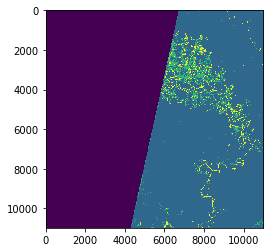

In [8]:
PYEO_model.show_satellite_image(out_classified)

In [9]:
# validate the map and generate accuracy matrix 
PYEO_model.validate_classes(inRaster=out_classified, shpdir=validation_shp , field_name=validation_field_name, 
                            out_fldr=out_dir)




~validating ... /home/ecci/Documents/data/training_colombia.shp
The clipped shapefile to the extent of the raster, resultant shp is saved in /home/ecci/Documents/output/outline_clip.shp
rasterise the shapefile
['0.0', '1.0', 54477752, 0.909409]
['0.0', '2.0', 3747532, 0.062558]
['0.0', '3.0', 1679260, 0.028032]
['1.0', '1.0', 517343, 0.99915]
['1.0', '2.0', 366, 0.000707]
['1.0', '3.0', 74, 0.000143]
['2.0', '1.0', 4, 0.000396]
['2.0', '2.0', 9477, 0.938503]
['2.0', '3.0', 617, 0.061101]
['3.0', '1.0', 2, 7.5e-05]
['3.0', '2.0', 378, 0.01423]
['3.0', '3.0', 26184, 0.985695]
